# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

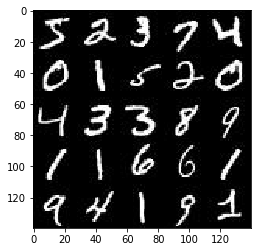

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

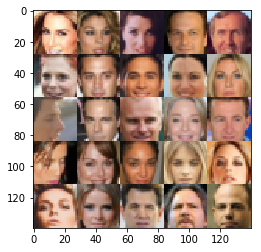

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/home/zxc012/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(dtype=tf.float32,shape=(None,image_width, image_height, image_channels),
                               name = 'input_real')
    input_z    = tf.placeholder(dtype=tf.float32,shape=(None,z_dim),name='input_z')
    learning_rate = tf.placeholder(dtype=tf.float32)
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator',reuse=reuse):
        alpha = 0.2
        # Input layer is 28x28x3 or 28x28x1
        dis_net = tf.layers.conv2d(inputs=images, filters=64, kernel_size=5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * dis_net, dis_net)
        # 14x14x64
        
        x2 = tf.layers.conv2d(inputs=relu1, filters=128, kernel_size=5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        alpha=0.2
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x128 now
        
        #x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        #x3 = tf.layers.batch_normalization(x3, training=is_train)
        #x3 = tf.maximum(alpha * x3, x3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x3or1 now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real,  reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #model_inputs(image_width, image_height, image_channels, z_dim)
    input_real, input_z, lr = model_inputs(data_shape[1],data_shape[2],data_shape[3], z_dim)
        
    #model_loss(input_real, input_z, out_channel_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
        
    #model_opt(d_loss, g_loss, learning_rate, beta1)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
        
    saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))

    samples, losses = [], []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images = batch_images * 2
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                #if steps % show_every == 0:
                #    gen_samples = sess.run(
                #                   generator(input_z, 3, reuse=True, is_train=False),
                #                   feed_dict={input_z: sample_z})
                #    samples.append(gen_samples)
                #    _ = view_samples(-1, samples, 6, 12, figsize=figsize)
                #    plt.show()
                
                if steps % 100 == 0:
                    _ = show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
        #saver.save(sess, './checkpoints/generator.ckpt')

    #with open('samples.pkl', 'wb') as f:
    #    pkl.dump(samples, f)
    
    return losses, samples

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 13.9905
Epoch 1/2... Discriminator Loss: 5.6408... Generator Loss: 0.4474
Epoch 1/2... Discriminator Loss: 0.1437... Generator Loss: 3.2671
Epoch 1/2... Discriminator Loss: 1.1185... Generator Loss: 3.1070
Epoch 1/2... Discriminator Loss: 1.1340... Generator Loss: 0.6995
Epoch 1/2... Discriminator Loss: 0.7120... Generator Loss: 2.6316
Epoch 1/2... Discriminator Loss: 0.8086... Generator Loss: 3.3849
Epoch 1/2... Discriminator Loss: 1.4210... Generator Loss: 0.6326
Epoch 1/2... Discriminator Loss: 1.3442... Generator Loss: 0.7007
Epoch 1/2... Discriminator Loss: 1.5125... Generator Loss: 1.8301


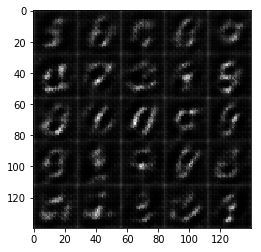

Epoch 1/2... Discriminator Loss: 1.0352... Generator Loss: 0.9310
Epoch 1/2... Discriminator Loss: 0.9312... Generator Loss: 1.1796
Epoch 1/2... Discriminator Loss: 1.2620... Generator Loss: 1.0192
Epoch 1/2... Discriminator Loss: 1.4474... Generator Loss: 0.4586
Epoch 1/2... Discriminator Loss: 0.7895... Generator Loss: 1.2252
Epoch 1/2... Discriminator Loss: 1.2911... Generator Loss: 1.0192
Epoch 1/2... Discriminator Loss: 1.4203... Generator Loss: 0.5004
Epoch 1/2... Discriminator Loss: 1.0929... Generator Loss: 1.7058
Epoch 1/2... Discriminator Loss: 1.3611... Generator Loss: 1.6881
Epoch 1/2... Discriminator Loss: 0.9696... Generator Loss: 1.2336


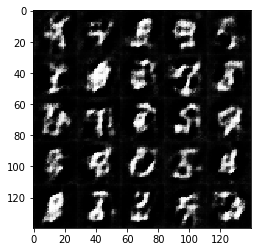

Epoch 1/2... Discriminator Loss: 0.8079... Generator Loss: 1.6799
Epoch 1/2... Discriminator Loss: 1.1712... Generator Loss: 0.9060
Epoch 1/2... Discriminator Loss: 0.8167... Generator Loss: 1.5293
Epoch 1/2... Discriminator Loss: 0.9692... Generator Loss: 2.0102
Epoch 1/2... Discriminator Loss: 1.2511... Generator Loss: 0.5174
Epoch 1/2... Discriminator Loss: 0.7745... Generator Loss: 1.6674
Epoch 1/2... Discriminator Loss: 0.9753... Generator Loss: 1.1271
Epoch 1/2... Discriminator Loss: 0.6436... Generator Loss: 1.2609
Epoch 1/2... Discriminator Loss: 0.9835... Generator Loss: 1.6023
Epoch 1/2... Discriminator Loss: 0.7868... Generator Loss: 1.5067


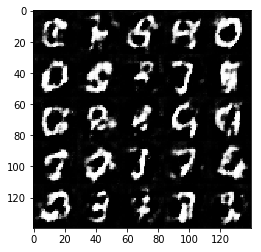

Epoch 1/2... Discriminator Loss: 0.7875... Generator Loss: 1.7021
Epoch 1/2... Discriminator Loss: 1.1567... Generator Loss: 1.0068
Epoch 1/2... Discriminator Loss: 1.1363... Generator Loss: 0.6511
Epoch 1/2... Discriminator Loss: 1.5611... Generator Loss: 0.3444
Epoch 1/2... Discriminator Loss: 1.2067... Generator Loss: 0.6010
Epoch 1/2... Discriminator Loss: 0.8680... Generator Loss: 1.4174
Epoch 1/2... Discriminator Loss: 1.1950... Generator Loss: 0.7891
Epoch 1/2... Discriminator Loss: 0.8068... Generator Loss: 1.4634
Epoch 1/2... Discriminator Loss: 1.1671... Generator Loss: 2.1912
Epoch 1/2... Discriminator Loss: 0.8490... Generator Loss: 1.3993


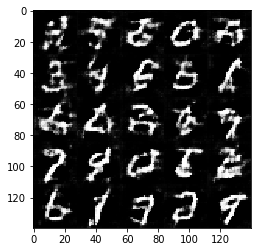

Epoch 1/2... Discriminator Loss: 0.9286... Generator Loss: 1.0830
Epoch 1/2... Discriminator Loss: 0.8764... Generator Loss: 1.4906
Epoch 1/2... Discriminator Loss: 0.9494... Generator Loss: 0.7733
Epoch 1/2... Discriminator Loss: 0.7308... Generator Loss: 1.6288
Epoch 1/2... Discriminator Loss: 1.2654... Generator Loss: 0.5605
Epoch 1/2... Discriminator Loss: 1.0270... Generator Loss: 0.7468
Epoch 1/2... Discriminator Loss: 1.1194... Generator Loss: 0.5301
Epoch 1/2... Discriminator Loss: 0.7641... Generator Loss: 1.1904
Epoch 1/2... Discriminator Loss: 1.3200... Generator Loss: 0.4508
Epoch 1/2... Discriminator Loss: 1.1843... Generator Loss: 1.6895


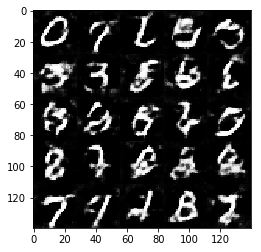

Epoch 1/2... Discriminator Loss: 1.2984... Generator Loss: 0.4951
Epoch 1/2... Discriminator Loss: 1.9744... Generator Loss: 0.2082
Epoch 1/2... Discriminator Loss: 0.7810... Generator Loss: 1.5399
Epoch 1/2... Discriminator Loss: 0.8802... Generator Loss: 0.9332
Epoch 1/2... Discriminator Loss: 1.8256... Generator Loss: 0.2363
Epoch 1/2... Discriminator Loss: 1.3832... Generator Loss: 0.5307
Epoch 1/2... Discriminator Loss: 1.2685... Generator Loss: 0.6447
Epoch 1/2... Discriminator Loss: 1.2829... Generator Loss: 0.6076
Epoch 1/2... Discriminator Loss: 0.7321... Generator Loss: 1.1584
Epoch 1/2... Discriminator Loss: 0.8449... Generator Loss: 0.8989


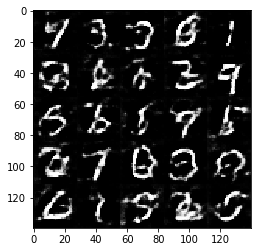

Epoch 1/2... Discriminator Loss: 1.4917... Generator Loss: 0.3999
Epoch 1/2... Discriminator Loss: 0.9106... Generator Loss: 1.1824
Epoch 1/2... Discriminator Loss: 1.5733... Generator Loss: 0.3183
Epoch 1/2... Discriminator Loss: 1.1226... Generator Loss: 0.6158
Epoch 1/2... Discriminator Loss: 2.1089... Generator Loss: 0.1886
Epoch 1/2... Discriminator Loss: 1.3374... Generator Loss: 0.5049
Epoch 1/2... Discriminator Loss: 1.3820... Generator Loss: 0.3824
Epoch 1/2... Discriminator Loss: 0.8005... Generator Loss: 1.0120
Epoch 1/2... Discriminator Loss: 0.6159... Generator Loss: 1.5448
Epoch 1/2... Discriminator Loss: 0.9438... Generator Loss: 1.0189


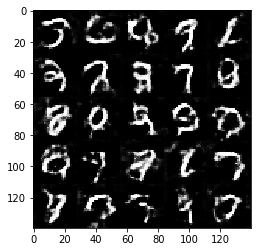

Epoch 1/2... Discriminator Loss: 1.5504... Generator Loss: 0.3864
Epoch 1/2... Discriminator Loss: 0.9679... Generator Loss: 0.6776
Epoch 1/2... Discriminator Loss: 0.9381... Generator Loss: 1.0941
Epoch 1/2... Discriminator Loss: 0.7213... Generator Loss: 1.1516
Epoch 1/2... Discriminator Loss: 1.2285... Generator Loss: 0.5058
Epoch 1/2... Discriminator Loss: 0.9595... Generator Loss: 0.7340
Epoch 1/2... Discriminator Loss: 1.3482... Generator Loss: 0.4702
Epoch 1/2... Discriminator Loss: 0.8374... Generator Loss: 0.9407
Epoch 1/2... Discriminator Loss: 0.9410... Generator Loss: 0.7132
Epoch 1/2... Discriminator Loss: 0.8352... Generator Loss: 0.8647


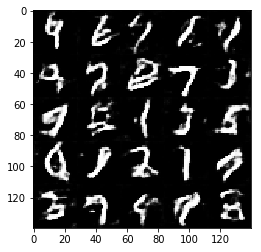

Epoch 1/2... Discriminator Loss: 0.7535... Generator Loss: 1.3556
Epoch 1/2... Discriminator Loss: 0.9524... Generator Loss: 0.7291
Epoch 1/2... Discriminator Loss: 0.7097... Generator Loss: 1.4794
Epoch 1/2... Discriminator Loss: 1.0621... Generator Loss: 0.7663
Epoch 1/2... Discriminator Loss: 0.8848... Generator Loss: 0.8955
Epoch 1/2... Discriminator Loss: 0.8186... Generator Loss: 0.9056
Epoch 1/2... Discriminator Loss: 1.2846... Generator Loss: 0.4557
Epoch 1/2... Discriminator Loss: 0.7627... Generator Loss: 1.1641
Epoch 1/2... Discriminator Loss: 1.2415... Generator Loss: 1.5391
Epoch 1/2... Discriminator Loss: 0.6374... Generator Loss: 1.5319


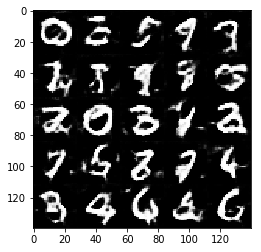

Epoch 1/2... Discriminator Loss: 1.1077... Generator Loss: 0.7734
Epoch 1/2... Discriminator Loss: 1.1833... Generator Loss: 0.5952
Epoch 1/2... Discriminator Loss: 1.0727... Generator Loss: 0.7996
Epoch 1/2... Discriminator Loss: 1.1512... Generator Loss: 0.6114
Epoch 1/2... Discriminator Loss: 0.8054... Generator Loss: 1.2739
Epoch 1/2... Discriminator Loss: 0.8263... Generator Loss: 0.8897
Epoch 1/2... Discriminator Loss: 1.1783... Generator Loss: 0.5099
Epoch 1/2... Discriminator Loss: 1.1190... Generator Loss: 1.0985
Epoch 1/2... Discriminator Loss: 1.0220... Generator Loss: 0.7118
Epoch 1/2... Discriminator Loss: 0.9373... Generator Loss: 1.5386


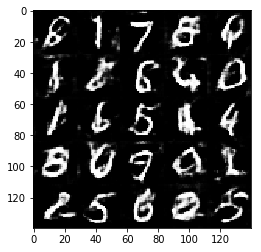

Epoch 1/2... Discriminator Loss: 1.0791... Generator Loss: 0.5747
Epoch 1/2... Discriminator Loss: 0.6687... Generator Loss: 1.4313
Epoch 1/2... Discriminator Loss: 0.9183... Generator Loss: 0.7505
Epoch 1/2... Discriminator Loss: 0.7609... Generator Loss: 1.6510
Epoch 1/2... Discriminator Loss: 0.6874... Generator Loss: 1.0050
Epoch 1/2... Discriminator Loss: 1.3717... Generator Loss: 0.5059
Epoch 1/2... Discriminator Loss: 0.9109... Generator Loss: 0.7482
Epoch 1/2... Discriminator Loss: 0.9010... Generator Loss: 0.7353
Epoch 1/2... Discriminator Loss: 0.7647... Generator Loss: 1.0119
Epoch 1/2... Discriminator Loss: 0.8910... Generator Loss: 0.8495


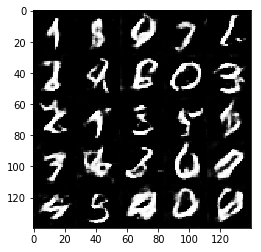

Epoch 1/2... Discriminator Loss: 0.8830... Generator Loss: 0.7495
Epoch 1/2... Discriminator Loss: 0.6648... Generator Loss: 1.3824
Epoch 1/2... Discriminator Loss: 0.6646... Generator Loss: 1.0539
Epoch 1/2... Discriminator Loss: 0.5769... Generator Loss: 1.7539
Epoch 1/2... Discriminator Loss: 1.8650... Generator Loss: 0.2678
Epoch 1/2... Discriminator Loss: 1.9403... Generator Loss: 0.2460
Epoch 1/2... Discriminator Loss: 0.9303... Generator Loss: 1.2149
Epoch 1/2... Discriminator Loss: 1.6207... Generator Loss: 0.3364
Epoch 1/2... Discriminator Loss: 1.7397... Generator Loss: 0.3145
Epoch 1/2... Discriminator Loss: 0.8432... Generator Loss: 0.9398


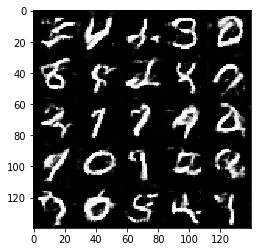

Epoch 1/2... Discriminator Loss: 1.3224... Generator Loss: 0.4928
Epoch 1/2... Discriminator Loss: 0.9928... Generator Loss: 0.7212
Epoch 1/2... Discriminator Loss: 0.8183... Generator Loss: 1.0470
Epoch 1/2... Discriminator Loss: 0.7901... Generator Loss: 1.1799
Epoch 1/2... Discriminator Loss: 0.6766... Generator Loss: 1.3204
Epoch 1/2... Discriminator Loss: 1.1739... Generator Loss: 0.6611
Epoch 1/2... Discriminator Loss: 0.6754... Generator Loss: 1.6248
Epoch 1/2... Discriminator Loss: 1.1740... Generator Loss: 0.7418
Epoch 1/2... Discriminator Loss: 0.8758... Generator Loss: 1.3220
Epoch 1/2... Discriminator Loss: 0.7938... Generator Loss: 0.8408


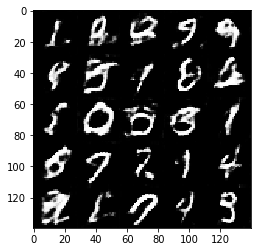

Epoch 1/2... Discriminator Loss: 0.8388... Generator Loss: 1.0065
Epoch 1/2... Discriminator Loss: 1.7145... Generator Loss: 0.3070
Epoch 1/2... Discriminator Loss: 0.8890... Generator Loss: 0.7976
Epoch 1/2... Discriminator Loss: 1.0734... Generator Loss: 0.8525
Epoch 1/2... Discriminator Loss: 0.6682... Generator Loss: 1.0617
Epoch 1/2... Discriminator Loss: 0.6609... Generator Loss: 1.0435
Epoch 1/2... Discriminator Loss: 0.8993... Generator Loss: 0.7840
Epoch 1/2... Discriminator Loss: 0.7622... Generator Loss: 0.8787
Epoch 1/2... Discriminator Loss: 0.6431... Generator Loss: 1.2763
Epoch 1/2... Discriminator Loss: 0.5279... Generator Loss: 1.1468


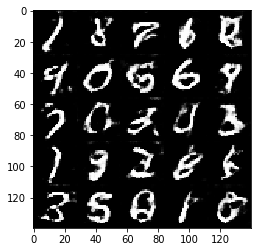

Epoch 1/2... Discriminator Loss: 1.9806... Generator Loss: 0.2139
Epoch 1/2... Discriminator Loss: 2.9535... Generator Loss: 4.4911
Epoch 1/2... Discriminator Loss: 1.1789... Generator Loss: 0.7279
Epoch 1/2... Discriminator Loss: 0.8121... Generator Loss: 0.9260
Epoch 1/2... Discriminator Loss: 0.6620... Generator Loss: 2.2965
Epoch 1/2... Discriminator Loss: 1.1219... Generator Loss: 0.5636
Epoch 1/2... Discriminator Loss: 0.8130... Generator Loss: 0.8497
Epoch 1/2... Discriminator Loss: 1.2641... Generator Loss: 0.5685
Epoch 1/2... Discriminator Loss: 1.0288... Generator Loss: 1.9382
Epoch 1/2... Discriminator Loss: 0.7784... Generator Loss: 1.0766


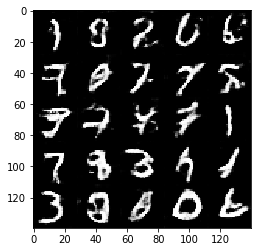

Epoch 1/2... Discriminator Loss: 1.8550... Generator Loss: 0.2559
Epoch 1/2... Discriminator Loss: 1.3986... Generator Loss: 0.4905
Epoch 1/2... Discriminator Loss: 0.5794... Generator Loss: 1.5028
Epoch 1/2... Discriminator Loss: 1.3911... Generator Loss: 0.4047
Epoch 1/2... Discriminator Loss: 0.9143... Generator Loss: 2.3013
Epoch 1/2... Discriminator Loss: 1.2933... Generator Loss: 0.6385
Epoch 1/2... Discriminator Loss: 1.2654... Generator Loss: 0.6754
Epoch 1/2... Discriminator Loss: 1.8640... Generator Loss: 0.2626
Epoch 1/2... Discriminator Loss: 1.3370... Generator Loss: 0.4395
Epoch 1/2... Discriminator Loss: 0.9678... Generator Loss: 3.1268


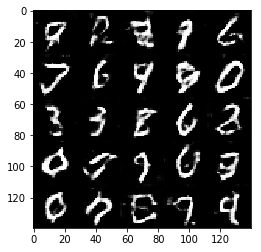

Epoch 1/2... Discriminator Loss: 0.5407... Generator Loss: 1.4965
Epoch 1/2... Discriminator Loss: 0.7472... Generator Loss: 1.0401
Epoch 1/2... Discriminator Loss: 0.7522... Generator Loss: 2.0014
Epoch 1/2... Discriminator Loss: 0.7301... Generator Loss: 1.0486
Epoch 1/2... Discriminator Loss: 0.8350... Generator Loss: 0.8165
Epoch 1/2... Discriminator Loss: 0.7086... Generator Loss: 1.3541
Epoch 1/2... Discriminator Loss: 0.9162... Generator Loss: 0.7317
Epoch 1/2... Discriminator Loss: 0.8789... Generator Loss: 0.9885
Epoch 1/2... Discriminator Loss: 0.5822... Generator Loss: 0.9740
Epoch 1/2... Discriminator Loss: 1.9396... Generator Loss: 0.2898


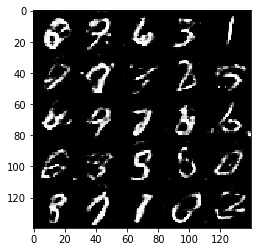

Epoch 1/2... Discriminator Loss: 1.4606... Generator Loss: 0.4356
Epoch 1/2... Discriminator Loss: 1.2996... Generator Loss: 0.6556
Epoch 1/2... Discriminator Loss: 1.7066... Generator Loss: 0.3765
Epoch 1/2... Discriminator Loss: 1.2304... Generator Loss: 0.6995
Epoch 1/2... Discriminator Loss: 0.4615... Generator Loss: 1.4165
Epoch 1/2... Discriminator Loss: 0.5680... Generator Loss: 1.4803
Epoch 1/2... Discriminator Loss: 0.9357... Generator Loss: 0.7258
Epoch 1/2... Discriminator Loss: 0.2426... Generator Loss: 2.2061
Epoch 1/2... Discriminator Loss: 0.7696... Generator Loss: 0.8240
Epoch 1/2... Discriminator Loss: 0.7449... Generator Loss: 0.9094


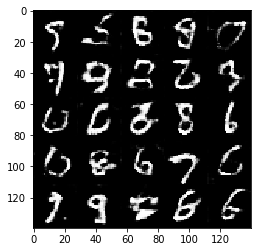

Epoch 1/2... Discriminator Loss: 0.8918... Generator Loss: 0.9152
Epoch 1/2... Discriminator Loss: 0.4394... Generator Loss: 1.7045
Epoch 1/2... Discriminator Loss: 3.0840... Generator Loss: 0.1078
Epoch 1/2... Discriminator Loss: 3.2125... Generator Loss: 8.1959
Epoch 1/2... Discriminator Loss: 0.4277... Generator Loss: 1.7727
Epoch 1/2... Discriminator Loss: 1.0334... Generator Loss: 1.2385
Epoch 1/2... Discriminator Loss: 1.4536... Generator Loss: 0.5133
Epoch 2/2... Discriminator Loss: 1.1845... Generator Loss: 0.6932
Epoch 2/2... Discriminator Loss: 0.5098... Generator Loss: 1.3999
Epoch 2/2... Discriminator Loss: 0.5714... Generator Loss: 1.2174


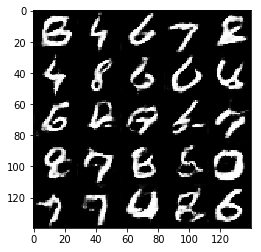

Epoch 2/2... Discriminator Loss: 1.1563... Generator Loss: 0.5819
Epoch 2/2... Discriminator Loss: 1.2501... Generator Loss: 0.4956
Epoch 2/2... Discriminator Loss: 0.7689... Generator Loss: 0.9472
Epoch 2/2... Discriminator Loss: 0.9156... Generator Loss: 0.9629
Epoch 2/2... Discriminator Loss: 0.5891... Generator Loss: 1.4464
Epoch 2/2... Discriminator Loss: 1.0515... Generator Loss: 0.7302
Epoch 2/2... Discriminator Loss: 0.5066... Generator Loss: 1.5705
Epoch 2/2... Discriminator Loss: 0.6069... Generator Loss: 1.1138
Epoch 2/2... Discriminator Loss: 0.4432... Generator Loss: 1.4921
Epoch 2/2... Discriminator Loss: 0.8546... Generator Loss: 0.8308


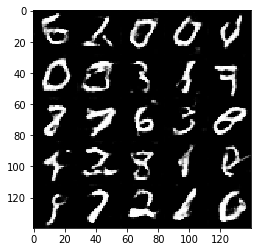

Epoch 2/2... Discriminator Loss: 1.9040... Generator Loss: 0.2513
Epoch 2/2... Discriminator Loss: 0.7596... Generator Loss: 1.6683
Epoch 2/2... Discriminator Loss: 0.6054... Generator Loss: 2.3387
Epoch 2/2... Discriminator Loss: 0.7427... Generator Loss: 1.0606
Epoch 2/2... Discriminator Loss: 0.4031... Generator Loss: 1.7953
Epoch 2/2... Discriminator Loss: 0.3719... Generator Loss: 2.0183
Epoch 2/2... Discriminator Loss: 1.4850... Generator Loss: 0.4309
Epoch 2/2... Discriminator Loss: 0.2850... Generator Loss: 2.0518
Epoch 2/2... Discriminator Loss: 2.2615... Generator Loss: 0.3272
Epoch 2/2... Discriminator Loss: 1.1278... Generator Loss: 0.6494


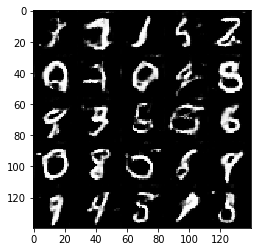

Epoch 2/2... Discriminator Loss: 1.1439... Generator Loss: 0.7917
Epoch 2/2... Discriminator Loss: 0.9722... Generator Loss: 0.7205
Epoch 2/2... Discriminator Loss: 2.2859... Generator Loss: 0.1897
Epoch 2/2... Discriminator Loss: 2.0685... Generator Loss: 0.3023
Epoch 2/2... Discriminator Loss: 0.8208... Generator Loss: 1.0372
Epoch 2/2... Discriminator Loss: 0.5474... Generator Loss: 1.5579
Epoch 2/2... Discriminator Loss: 1.3967... Generator Loss: 0.4377
Epoch 2/2... Discriminator Loss: 0.5985... Generator Loss: 1.8255
Epoch 2/2... Discriminator Loss: 0.4152... Generator Loss: 2.3390
Epoch 2/2... Discriminator Loss: 0.8577... Generator Loss: 1.0752


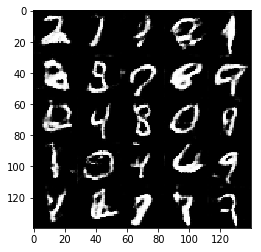

Epoch 2/2... Discriminator Loss: 0.4740... Generator Loss: 1.6597
Epoch 2/2... Discriminator Loss: 1.4691... Generator Loss: 0.5236
Epoch 2/2... Discriminator Loss: 1.0137... Generator Loss: 0.7321
Epoch 2/2... Discriminator Loss: 1.6544... Generator Loss: 0.3420
Epoch 2/2... Discriminator Loss: 1.1604... Generator Loss: 0.7559
Epoch 2/2... Discriminator Loss: 1.3370... Generator Loss: 0.4168
Epoch 2/2... Discriminator Loss: 0.5772... Generator Loss: 1.4091
Epoch 2/2... Discriminator Loss: 2.9216... Generator Loss: 0.1228
Epoch 2/2... Discriminator Loss: 0.3949... Generator Loss: 2.1334
Epoch 2/2... Discriminator Loss: 0.8553... Generator Loss: 0.8107


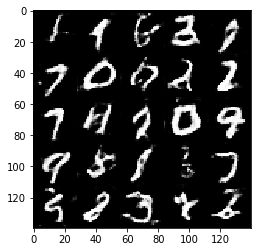

Epoch 2/2... Discriminator Loss: 0.3555... Generator Loss: 1.9628
Epoch 2/2... Discriminator Loss: 0.5311... Generator Loss: 1.4365
Epoch 2/2... Discriminator Loss: 0.8498... Generator Loss: 0.7634
Epoch 2/2... Discriminator Loss: 1.2210... Generator Loss: 0.5154
Epoch 2/2... Discriminator Loss: 0.7765... Generator Loss: 0.9812
Epoch 2/2... Discriminator Loss: 0.6690... Generator Loss: 0.8456
Epoch 2/2... Discriminator Loss: 0.6335... Generator Loss: 1.1650
Epoch 2/2... Discriminator Loss: 0.6138... Generator Loss: 1.1999
Epoch 2/2... Discriminator Loss: 0.4486... Generator Loss: 1.5718
Epoch 2/2... Discriminator Loss: 0.8660... Generator Loss: 0.8608


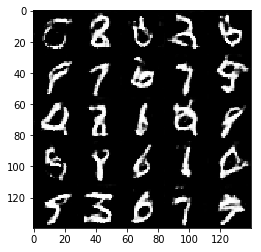

Epoch 2/2... Discriminator Loss: 0.4678... Generator Loss: 1.6059
Epoch 2/2... Discriminator Loss: 0.6550... Generator Loss: 0.9304
Epoch 2/2... Discriminator Loss: 1.5260... Generator Loss: 0.3889
Epoch 2/2... Discriminator Loss: 0.5947... Generator Loss: 1.2531
Epoch 2/2... Discriminator Loss: 1.6368... Generator Loss: 0.3350
Epoch 2/2... Discriminator Loss: 0.3401... Generator Loss: 1.7738
Epoch 2/2... Discriminator Loss: 1.0312... Generator Loss: 0.7482
Epoch 2/2... Discriminator Loss: 0.6245... Generator Loss: 1.2962
Epoch 2/2... Discriminator Loss: 0.5386... Generator Loss: 1.2266
Epoch 2/2... Discriminator Loss: 0.2191... Generator Loss: 2.2905


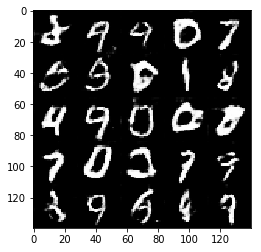

Epoch 2/2... Discriminator Loss: 0.8949... Generator Loss: 0.9054
Epoch 2/2... Discriminator Loss: 1.1099... Generator Loss: 0.6136
Epoch 2/2... Discriminator Loss: 0.4484... Generator Loss: 1.6404
Epoch 2/2... Discriminator Loss: 0.2163... Generator Loss: 2.3329
Epoch 2/2... Discriminator Loss: 0.2703... Generator Loss: 2.2512
Epoch 2/2... Discriminator Loss: 0.5122... Generator Loss: 1.6250
Epoch 2/2... Discriminator Loss: 0.3401... Generator Loss: 1.8771
Epoch 2/2... Discriminator Loss: 0.2709... Generator Loss: 2.9242
Epoch 2/2... Discriminator Loss: 0.8281... Generator Loss: 0.9845
Epoch 2/2... Discriminator Loss: 0.5523... Generator Loss: 1.5002


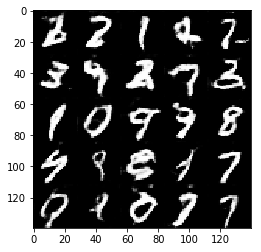

Epoch 2/2... Discriminator Loss: 0.4323... Generator Loss: 1.6601
Epoch 2/2... Discriminator Loss: 1.5842... Generator Loss: 0.4181
Epoch 2/2... Discriminator Loss: 0.6266... Generator Loss: 1.3685
Epoch 2/2... Discriminator Loss: 0.3786... Generator Loss: 1.7792
Epoch 2/2... Discriminator Loss: 0.4688... Generator Loss: 1.4114
Epoch 2/2... Discriminator Loss: 0.4055... Generator Loss: 1.6633
Epoch 2/2... Discriminator Loss: 0.6476... Generator Loss: 4.0925
Epoch 2/2... Discriminator Loss: 0.6859... Generator Loss: 1.6119
Epoch 2/2... Discriminator Loss: 0.5001... Generator Loss: 3.2700
Epoch 2/2... Discriminator Loss: 1.3523... Generator Loss: 0.5191


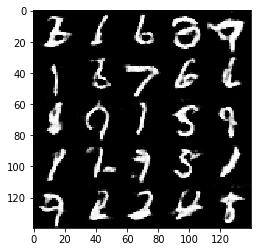

Epoch 2/2... Discriminator Loss: 1.4265... Generator Loss: 0.5834
Epoch 2/2... Discriminator Loss: 0.4793... Generator Loss: 1.3735
Epoch 2/2... Discriminator Loss: 0.2043... Generator Loss: 2.8177
Epoch 2/2... Discriminator Loss: 0.5979... Generator Loss: 1.1756
Epoch 2/2... Discriminator Loss: 0.4057... Generator Loss: 1.9435
Epoch 2/2... Discriminator Loss: 1.0107... Generator Loss: 0.8074
Epoch 2/2... Discriminator Loss: 2.5112... Generator Loss: 0.2237
Epoch 2/2... Discriminator Loss: 1.5309... Generator Loss: 6.9058
Epoch 2/2... Discriminator Loss: 2.2876... Generator Loss: 0.2005
Epoch 2/2... Discriminator Loss: 1.3402... Generator Loss: 0.5560


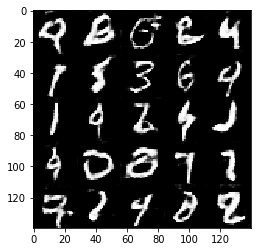

Epoch 2/2... Discriminator Loss: 0.7852... Generator Loss: 1.2303
Epoch 2/2... Discriminator Loss: 1.1497... Generator Loss: 0.5442
Epoch 2/2... Discriminator Loss: 0.6539... Generator Loss: 1.2937
Epoch 2/2... Discriminator Loss: 0.4135... Generator Loss: 2.2554
Epoch 2/2... Discriminator Loss: 0.9764... Generator Loss: 0.7888
Epoch 2/2... Discriminator Loss: 0.3796... Generator Loss: 2.3952
Epoch 2/2... Discriminator Loss: 1.9134... Generator Loss: 0.2590
Epoch 2/2... Discriminator Loss: 0.9641... Generator Loss: 0.9077
Epoch 2/2... Discriminator Loss: 0.5874... Generator Loss: 2.6364
Epoch 2/2... Discriminator Loss: 1.2058... Generator Loss: 3.6076


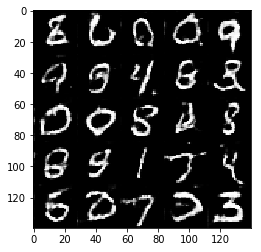

Epoch 2/2... Discriminator Loss: 0.4459... Generator Loss: 1.8730
Epoch 2/2... Discriminator Loss: 0.4708... Generator Loss: 1.4370
Epoch 2/2... Discriminator Loss: 1.5738... Generator Loss: 0.4612
Epoch 2/2... Discriminator Loss: 1.2893... Generator Loss: 0.6182
Epoch 2/2... Discriminator Loss: 1.1260... Generator Loss: 0.6797
Epoch 2/2... Discriminator Loss: 0.7449... Generator Loss: 1.1971
Epoch 2/2... Discriminator Loss: 0.7044... Generator Loss: 1.1086
Epoch 2/2... Discriminator Loss: 0.5897... Generator Loss: 1.0988
Epoch 2/2... Discriminator Loss: 0.3780... Generator Loss: 1.7477
Epoch 2/2... Discriminator Loss: 0.4836... Generator Loss: 1.5381


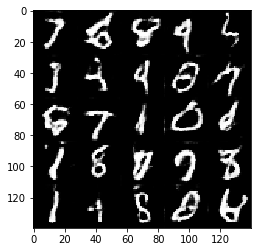

Epoch 2/2... Discriminator Loss: 0.3531... Generator Loss: 1.7689
Epoch 2/2... Discriminator Loss: 1.3243... Generator Loss: 0.4860
Epoch 2/2... Discriminator Loss: 0.4516... Generator Loss: 2.1487
Epoch 2/2... Discriminator Loss: 0.3941... Generator Loss: 1.7130
Epoch 2/2... Discriminator Loss: 0.3522... Generator Loss: 1.6550
Epoch 2/2... Discriminator Loss: 0.4464... Generator Loss: 1.8198
Epoch 2/2... Discriminator Loss: 0.7516... Generator Loss: 0.9327
Epoch 2/2... Discriminator Loss: 1.3935... Generator Loss: 0.4607
Epoch 2/2... Discriminator Loss: 0.5054... Generator Loss: 1.4724
Epoch 2/2... Discriminator Loss: 0.1709... Generator Loss: 3.5768


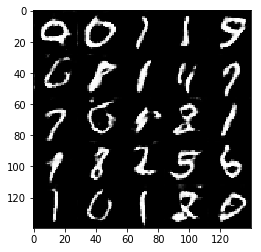

Epoch 2/2... Discriminator Loss: 0.8355... Generator Loss: 1.0297
Epoch 2/2... Discriminator Loss: 0.7185... Generator Loss: 1.0092
Epoch 2/2... Discriminator Loss: 0.7730... Generator Loss: 0.9908
Epoch 2/2... Discriminator Loss: 0.3513... Generator Loss: 1.7872
Epoch 2/2... Discriminator Loss: 0.4801... Generator Loss: 1.5435
Epoch 2/2... Discriminator Loss: 0.9261... Generator Loss: 0.7865
Epoch 2/2... Discriminator Loss: 0.2673... Generator Loss: 1.9308
Epoch 2/2... Discriminator Loss: 0.4140... Generator Loss: 1.9281
Epoch 2/2... Discriminator Loss: 0.5543... Generator Loss: 1.9532
Epoch 2/2... Discriminator Loss: 1.1406... Generator Loss: 0.6325


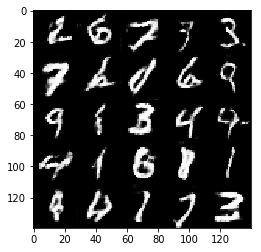

Epoch 2/2... Discriminator Loss: 1.1762... Generator Loss: 0.6414
Epoch 2/2... Discriminator Loss: 1.7358... Generator Loss: 0.3238
Epoch 2/2... Discriminator Loss: 0.6282... Generator Loss: 1.1836
Epoch 2/2... Discriminator Loss: 0.7994... Generator Loss: 0.8565
Epoch 2/2... Discriminator Loss: 1.0201... Generator Loss: 0.6153
Epoch 2/2... Discriminator Loss: 0.4577... Generator Loss: 1.8189
Epoch 2/2... Discriminator Loss: 1.0951... Generator Loss: 0.7927
Epoch 2/2... Discriminator Loss: 0.5983... Generator Loss: 1.3605
Epoch 2/2... Discriminator Loss: 0.3926... Generator Loss: 2.1099
Epoch 2/2... Discriminator Loss: 2.0674... Generator Loss: 0.3667


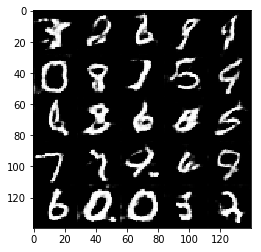

Epoch 2/2... Discriminator Loss: 1.2978... Generator Loss: 0.8221
Epoch 2/2... Discriminator Loss: 0.9700... Generator Loss: 0.8700
Epoch 2/2... Discriminator Loss: 1.2332... Generator Loss: 0.9519
Epoch 2/2... Discriminator Loss: 0.4117... Generator Loss: 1.3916
Epoch 2/2... Discriminator Loss: 0.3772... Generator Loss: 1.6228
Epoch 2/2... Discriminator Loss: 0.2068... Generator Loss: 2.2987
Epoch 2/2... Discriminator Loss: 0.4833... Generator Loss: 1.5019
Epoch 2/2... Discriminator Loss: 1.7228... Generator Loss: 0.4429
Epoch 2/2... Discriminator Loss: 0.9009... Generator Loss: 1.2484
Epoch 2/2... Discriminator Loss: 1.3886... Generator Loss: 0.5709


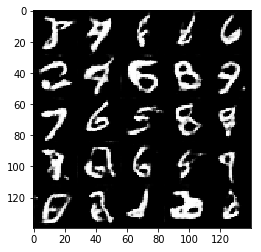

Epoch 2/2... Discriminator Loss: 2.2507... Generator Loss: 0.2088
Epoch 2/2... Discriminator Loss: 0.3218... Generator Loss: 2.2760
Epoch 2/2... Discriminator Loss: 0.4291... Generator Loss: 1.9635
Epoch 2/2... Discriminator Loss: 1.7956... Generator Loss: 0.3098
Epoch 2/2... Discriminator Loss: 1.8428... Generator Loss: 0.3437
Epoch 2/2... Discriminator Loss: 0.5803... Generator Loss: 1.4246
Epoch 2/2... Discriminator Loss: 0.5884... Generator Loss: 1.5044
Epoch 2/2... Discriminator Loss: 0.8438... Generator Loss: 1.0261
Epoch 2/2... Discriminator Loss: 0.6057... Generator Loss: 1.2601
Epoch 2/2... Discriminator Loss: 1.1521... Generator Loss: 0.5109


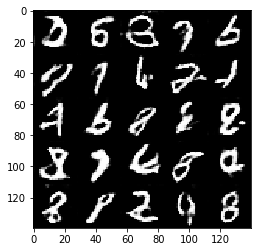

Epoch 2/2... Discriminator Loss: 1.5333... Generator Loss: 0.4586
Epoch 2/2... Discriminator Loss: 0.8141... Generator Loss: 1.0481
Epoch 2/2... Discriminator Loss: 2.6651... Generator Loss: 0.1878
Epoch 2/2... Discriminator Loss: 0.4792... Generator Loss: 1.5221
Epoch 2/2... Discriminator Loss: 1.2249... Generator Loss: 0.6712
Epoch 2/2... Discriminator Loss: 1.5225... Generator Loss: 0.5025
Epoch 2/2... Discriminator Loss: 0.7797... Generator Loss: 1.1821
Epoch 2/2... Discriminator Loss: 0.7460... Generator Loss: 1.1376
Epoch 2/2... Discriminator Loss: 0.6737... Generator Loss: 1.1180
Epoch 2/2... Discriminator Loss: 0.3276... Generator Loss: 1.7777


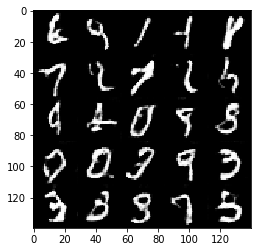

Epoch 2/2... Discriminator Loss: 1.4685... Generator Loss: 0.5168
Epoch 2/2... Discriminator Loss: 0.8547... Generator Loss: 0.8065
Epoch 2/2... Discriminator Loss: 0.5465... Generator Loss: 1.6000
Epoch 2/2... Discriminator Loss: 3.5774... Generator Loss: 0.0469
Epoch 2/2... Discriminator Loss: 0.9363... Generator Loss: 0.8655
Epoch 2/2... Discriminator Loss: 0.4688... Generator Loss: 2.1258
Epoch 2/2... Discriminator Loss: 0.7787... Generator Loss: 0.9717
Epoch 2/2... Discriminator Loss: 1.2631... Generator Loss: 0.6481
Epoch 2/2... Discriminator Loss: 0.4703... Generator Loss: 1.7560
Epoch 2/2... Discriminator Loss: 1.0287... Generator Loss: 0.9389


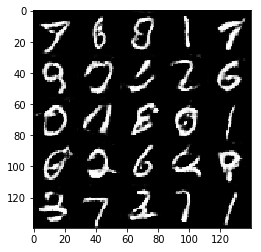

Epoch 2/2... Discriminator Loss: 0.6134... Generator Loss: 1.4569
Epoch 2/2... Discriminator Loss: 0.2159... Generator Loss: 4.9866
Epoch 2/2... Discriminator Loss: 0.7625... Generator Loss: 1.5874
Epoch 2/2... Discriminator Loss: 0.2208... Generator Loss: 3.4833
Epoch 2/2... Discriminator Loss: 0.2830... Generator Loss: 3.8968


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.1674... Generator Loss: 3.1271
Epoch 1/1... Discriminator Loss: 1.7123... Generator Loss: 0.6318
Epoch 1/1... Discriminator Loss: 1.7053... Generator Loss: 16.3019
Epoch 1/1... Discriminator Loss: 1.3149... Generator Loss: 0.7515
Epoch 1/1... Discriminator Loss: 1.5248... Generator Loss: 2.3829
Epoch 1/1... Discriminator Loss: 1.3645... Generator Loss: 0.9005
Epoch 1/1... Discriminator Loss: 1.5043... Generator Loss: 4.1986
Epoch 1/1... Discriminator Loss: 3.3284... Generator Loss: 0.0809
Epoch 1/1... Discriminator Loss: 1.6066... Generator Loss: 0.4289
Epoch 1/1... Discriminator Loss: 1.6553... Generator Loss: 0.4246


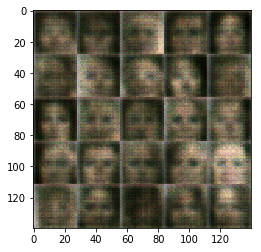

Epoch 1/1... Discriminator Loss: 0.6790... Generator Loss: 2.3673
Epoch 1/1... Discriminator Loss: 0.9210... Generator Loss: 0.8852
Epoch 1/1... Discriminator Loss: 2.1080... Generator Loss: 0.2079
Epoch 1/1... Discriminator Loss: 1.4535... Generator Loss: 2.5581
Epoch 1/1... Discriminator Loss: 1.6789... Generator Loss: 1.0307
Epoch 1/1... Discriminator Loss: 1.2718... Generator Loss: 0.5287
Epoch 1/1... Discriminator Loss: 1.1301... Generator Loss: 0.6887
Epoch 1/1... Discriminator Loss: 1.2759... Generator Loss: 0.6873
Epoch 1/1... Discriminator Loss: 1.1075... Generator Loss: 1.5138
Epoch 1/1... Discriminator Loss: 0.9730... Generator Loss: 1.3511


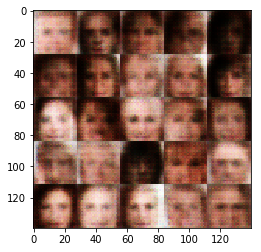

Epoch 1/1... Discriminator Loss: 0.9149... Generator Loss: 1.8213
Epoch 1/1... Discriminator Loss: 1.0744... Generator Loss: 0.7289
Epoch 1/1... Discriminator Loss: 2.1245... Generator Loss: 0.1680
Epoch 1/1... Discriminator Loss: 2.0231... Generator Loss: 0.1803
Epoch 1/1... Discriminator Loss: 0.9341... Generator Loss: 0.8685
Epoch 1/1... Discriminator Loss: 1.0579... Generator Loss: 0.7393
Epoch 1/1... Discriminator Loss: 1.0160... Generator Loss: 0.6648
Epoch 1/1... Discriminator Loss: 1.1181... Generator Loss: 1.4206
Epoch 1/1... Discriminator Loss: 1.7730... Generator Loss: 0.2704
Epoch 1/1... Discriminator Loss: 1.5113... Generator Loss: 0.4996


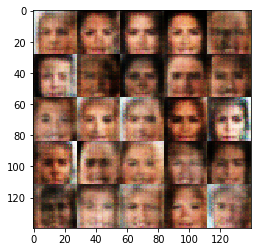

Epoch 1/1... Discriminator Loss: 1.2642... Generator Loss: 0.6626
Epoch 1/1... Discriminator Loss: 1.4387... Generator Loss: 0.9598
Epoch 1/1... Discriminator Loss: 1.2902... Generator Loss: 0.9623
Epoch 1/1... Discriminator Loss: 1.3013... Generator Loss: 0.8185
Epoch 1/1... Discriminator Loss: 1.4070... Generator Loss: 0.7921
Epoch 1/1... Discriminator Loss: 1.2576... Generator Loss: 1.7835
Epoch 1/1... Discriminator Loss: 0.9851... Generator Loss: 1.1637
Epoch 1/1... Discriminator Loss: 0.9950... Generator Loss: 0.9363
Epoch 1/1... Discriminator Loss: 1.8880... Generator Loss: 0.2818
Epoch 1/1... Discriminator Loss: 1.2620... Generator Loss: 0.8920


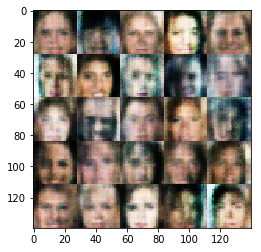

Epoch 1/1... Discriminator Loss: 1.1975... Generator Loss: 0.6114
Epoch 1/1... Discriminator Loss: 1.4467... Generator Loss: 0.6399
Epoch 1/1... Discriminator Loss: 1.7838... Generator Loss: 0.2587
Epoch 1/1... Discriminator Loss: 0.9034... Generator Loss: 1.2495
Epoch 1/1... Discriminator Loss: 1.2666... Generator Loss: 0.9673
Epoch 1/1... Discriminator Loss: 0.9891... Generator Loss: 0.9251
Epoch 1/1... Discriminator Loss: 1.2342... Generator Loss: 0.6424
Epoch 1/1... Discriminator Loss: 1.0600... Generator Loss: 0.7104
Epoch 1/1... Discriminator Loss: 1.4480... Generator Loss: 1.0119
Epoch 1/1... Discriminator Loss: 0.6214... Generator Loss: 2.0752


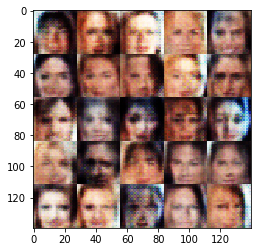

Epoch 1/1... Discriminator Loss: 1.1836... Generator Loss: 0.6572
Epoch 1/1... Discriminator Loss: 1.1454... Generator Loss: 0.6953
Epoch 1/1... Discriminator Loss: 0.9002... Generator Loss: 1.1614
Epoch 1/1... Discriminator Loss: 1.4039... Generator Loss: 0.5238
Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.9765
Epoch 1/1... Discriminator Loss: 1.2733... Generator Loss: 0.9876
Epoch 1/1... Discriminator Loss: 0.4962... Generator Loss: 2.9897
Epoch 1/1... Discriminator Loss: 1.1171... Generator Loss: 0.7114
Epoch 1/1... Discriminator Loss: 1.4592... Generator Loss: 0.3726
Epoch 1/1... Discriminator Loss: 0.5302... Generator Loss: 2.5954


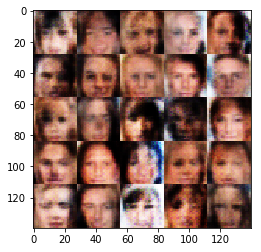

Epoch 1/1... Discriminator Loss: 0.3880... Generator Loss: 2.5280
Epoch 1/1... Discriminator Loss: 1.4295... Generator Loss: 0.4140
Epoch 1/1... Discriminator Loss: 1.3645... Generator Loss: 0.4127
Epoch 1/1... Discriminator Loss: 0.4642... Generator Loss: 1.5887
Epoch 1/1... Discriminator Loss: 1.1908... Generator Loss: 1.0307
Epoch 1/1... Discriminator Loss: 0.5804... Generator Loss: 1.1230
Epoch 1/1... Discriminator Loss: 0.4953... Generator Loss: 3.0317
Epoch 1/1... Discriminator Loss: 0.5301... Generator Loss: 1.6663
Epoch 1/1... Discriminator Loss: 0.2793... Generator Loss: 3.2196
Epoch 1/1... Discriminator Loss: 0.8756... Generator Loss: 0.7601


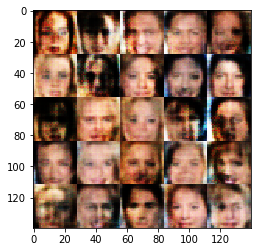

Epoch 1/1... Discriminator Loss: 0.5223... Generator Loss: 1.3756
Epoch 1/1... Discriminator Loss: 0.5993... Generator Loss: 2.4778
Epoch 1/1... Discriminator Loss: 0.3673... Generator Loss: 4.5321
Epoch 1/1... Discriminator Loss: 0.2308... Generator Loss: 2.8041
Epoch 1/1... Discriminator Loss: 0.4212... Generator Loss: 2.8879
Epoch 1/1... Discriminator Loss: 0.3849... Generator Loss: 5.8705
Epoch 1/1... Discriminator Loss: 0.2833... Generator Loss: 1.7843
Epoch 1/1... Discriminator Loss: 0.1375... Generator Loss: 5.4410
Epoch 1/1... Discriminator Loss: 0.1071... Generator Loss: 4.8891
Epoch 1/1... Discriminator Loss: 0.0812... Generator Loss: 4.7903


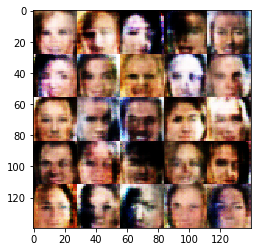

Epoch 1/1... Discriminator Loss: 1.2532... Generator Loss: 7.5283
Epoch 1/1... Discriminator Loss: 0.0824... Generator Loss: 3.9387
Epoch 1/1... Discriminator Loss: 0.0802... Generator Loss: 5.0005
Epoch 1/1... Discriminator Loss: 0.2675... Generator Loss: 2.5714
Epoch 1/1... Discriminator Loss: 0.2886... Generator Loss: 1.7351
Epoch 1/1... Discriminator Loss: 2.0492... Generator Loss: 0.1986
Epoch 1/1... Discriminator Loss: 0.2151... Generator Loss: 2.6399
Epoch 1/1... Discriminator Loss: 1.2483... Generator Loss: 0.4772
Epoch 1/1... Discriminator Loss: 0.3070... Generator Loss: 5.5214
Epoch 1/1... Discriminator Loss: 0.2389... Generator Loss: 2.3789


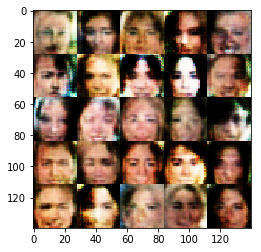

Epoch 1/1... Discriminator Loss: 0.1168... Generator Loss: 2.7536
Epoch 1/1... Discriminator Loss: 0.1573... Generator Loss: 2.2282
Epoch 1/1... Discriminator Loss: 0.3829... Generator Loss: 7.3025
Epoch 1/1... Discriminator Loss: 0.0937... Generator Loss: 7.7038
Epoch 1/1... Discriminator Loss: 0.5521... Generator Loss: 1.0837
Epoch 1/1... Discriminator Loss: 0.4968... Generator Loss: 1.2692
Epoch 1/1... Discriminator Loss: 0.6021... Generator Loss: 1.1070
Epoch 1/1... Discriminator Loss: 0.1250... Generator Loss: 5.3104
Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 0.3992
Epoch 1/1... Discriminator Loss: 0.1812... Generator Loss: 3.0894


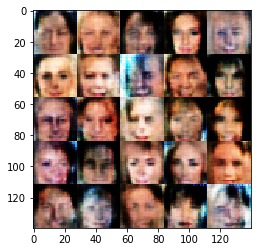

Epoch 1/1... Discriminator Loss: 0.4266... Generator Loss: 1.3916
Epoch 1/1... Discriminator Loss: 0.0639... Generator Loss: 5.6622
Epoch 1/1... Discriminator Loss: 0.2961... Generator Loss: 6.3196
Epoch 1/1... Discriminator Loss: 0.0397... Generator Loss: 5.6654
Epoch 1/1... Discriminator Loss: 0.0748... Generator Loss: 5.0833
Epoch 1/1... Discriminator Loss: 0.1312... Generator Loss: 2.5703
Epoch 1/1... Discriminator Loss: 2.4637... Generator Loss: 0.1262
Epoch 1/1... Discriminator Loss: 0.0846... Generator Loss: 4.2862
Epoch 1/1... Discriminator Loss: 1.3289... Generator Loss: 0.3938
Epoch 1/1... Discriminator Loss: 0.1172... Generator Loss: 6.4542


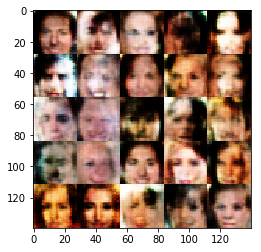

Epoch 1/1... Discriminator Loss: 0.5609... Generator Loss: 3.6584
Epoch 1/1... Discriminator Loss: 0.5173... Generator Loss: 1.2034
Epoch 1/1... Discriminator Loss: 0.2248... Generator Loss: 2.0770
Epoch 1/1... Discriminator Loss: 0.2465... Generator Loss: 2.5391
Epoch 1/1... Discriminator Loss: 1.7151... Generator Loss: 0.2750
Epoch 1/1... Discriminator Loss: 0.0737... Generator Loss: 5.0073
Epoch 1/1... Discriminator Loss: 0.0692... Generator Loss: 4.5774
Epoch 1/1... Discriminator Loss: 0.3734... Generator Loss: 1.4320
Epoch 1/1... Discriminator Loss: 0.0481... Generator Loss: 4.2855
Epoch 1/1... Discriminator Loss: 1.1946... Generator Loss: 2.6564


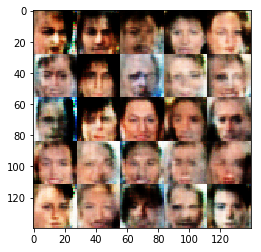

Epoch 1/1... Discriminator Loss: 0.4203... Generator Loss: 1.5063
Epoch 1/1... Discriminator Loss: 0.0740... Generator Loss: 3.3635
Epoch 1/1... Discriminator Loss: 1.4488... Generator Loss: 0.3469
Epoch 1/1... Discriminator Loss: 0.0524... Generator Loss: 3.3231
Epoch 1/1... Discriminator Loss: 0.0402... Generator Loss: 3.9632
Epoch 1/1... Discriminator Loss: 0.1637... Generator Loss: 4.0845
Epoch 1/1... Discriminator Loss: 0.1154... Generator Loss: 4.0159
Epoch 1/1... Discriminator Loss: 0.0546... Generator Loss: 3.7709
Epoch 1/1... Discriminator Loss: 0.2424... Generator Loss: 1.9684
Epoch 1/1... Discriminator Loss: 0.0674... Generator Loss: 6.9111


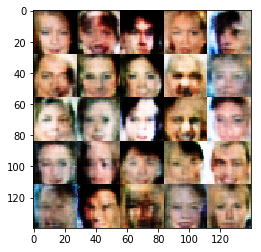

Epoch 1/1... Discriminator Loss: 0.0712... Generator Loss: 5.0076
Epoch 1/1... Discriminator Loss: 0.1402... Generator Loss: 2.5368
Epoch 1/1... Discriminator Loss: 0.1924... Generator Loss: 2.1784
Epoch 1/1... Discriminator Loss: 1.3291... Generator Loss: 0.5538
Epoch 1/1... Discriminator Loss: 0.8893... Generator Loss: 1.4461
Epoch 1/1... Discriminator Loss: 0.1564... Generator Loss: 2.8914
Epoch 1/1... Discriminator Loss: 1.2570... Generator Loss: 0.5104
Epoch 1/1... Discriminator Loss: 0.0957... Generator Loss: 3.1486
Epoch 1/1... Discriminator Loss: 0.1439... Generator Loss: 3.7028
Epoch 1/1... Discriminator Loss: 0.1328... Generator Loss: 5.9506


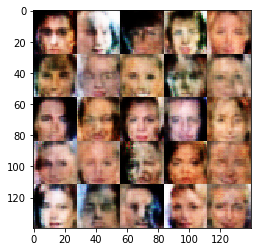

Epoch 1/1... Discriminator Loss: 0.1774... Generator Loss: 2.5407
Epoch 1/1... Discriminator Loss: 0.2270... Generator Loss: 1.9476
Epoch 1/1... Discriminator Loss: 0.1180... Generator Loss: 2.9382
Epoch 1/1... Discriminator Loss: 0.0329... Generator Loss: 8.3428
Epoch 1/1... Discriminator Loss: 0.1876... Generator Loss: 2.0437
Epoch 1/1... Discriminator Loss: 0.1031... Generator Loss: 7.9370
Epoch 1/1... Discriminator Loss: 0.4124... Generator Loss: 2.5835
Epoch 1/1... Discriminator Loss: 0.0639... Generator Loss: 7.0482
Epoch 1/1... Discriminator Loss: 0.2420... Generator Loss: 4.2263
Epoch 1/1... Discriminator Loss: 0.0602... Generator Loss: 4.5522


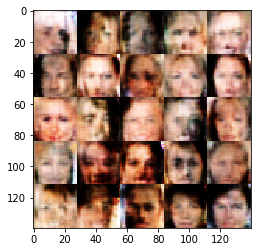

Epoch 1/1... Discriminator Loss: 1.1258... Generator Loss: 0.5932
Epoch 1/1... Discriminator Loss: 0.7777... Generator Loss: 0.8376
Epoch 1/1... Discriminator Loss: 1.7307... Generator Loss: 0.2638
Epoch 1/1... Discriminator Loss: 1.8194... Generator Loss: 3.5422
Epoch 1/1... Discriminator Loss: 0.8675... Generator Loss: 0.9398
Epoch 1/1... Discriminator Loss: 0.7197... Generator Loss: 1.1552
Epoch 1/1... Discriminator Loss: 0.7056... Generator Loss: 1.0648
Epoch 1/1... Discriminator Loss: 0.9038... Generator Loss: 0.8954
Epoch 1/1... Discriminator Loss: 0.1559... Generator Loss: 3.5753
Epoch 1/1... Discriminator Loss: 0.3937... Generator Loss: 2.3193


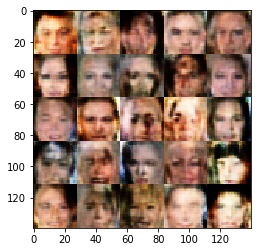

Epoch 1/1... Discriminator Loss: 1.1456... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 0.4817... Generator Loss: 1.7344
Epoch 1/1... Discriminator Loss: 0.2104... Generator Loss: 5.0236
Epoch 1/1... Discriminator Loss: 0.9530... Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 0.8021... Generator Loss: 0.9178
Epoch 1/1... Discriminator Loss: 0.2000... Generator Loss: 2.5700
Epoch 1/1... Discriminator Loss: 2.1921... Generator Loss: 0.1928
Epoch 1/1... Discriminator Loss: 0.1243... Generator Loss: 2.6139
Epoch 1/1... Discriminator Loss: 0.6834... Generator Loss: 0.9491
Epoch 1/1... Discriminator Loss: 0.6350... Generator Loss: 1.1551


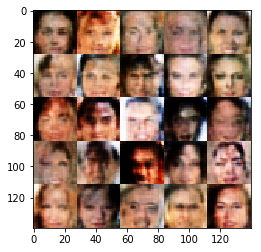

Epoch 1/1... Discriminator Loss: 0.2647... Generator Loss: 1.9437
Epoch 1/1... Discriminator Loss: 0.1902... Generator Loss: 2.2921
Epoch 1/1... Discriminator Loss: 0.0787... Generator Loss: 3.8115
Epoch 1/1... Discriminator Loss: 0.0751... Generator Loss: 5.7875
Epoch 1/1... Discriminator Loss: 0.0939... Generator Loss: 3.7963
Epoch 1/1... Discriminator Loss: 0.0426... Generator Loss: 4.2640
Epoch 1/1... Discriminator Loss: 0.0760... Generator Loss: 3.2361
Epoch 1/1... Discriminator Loss: 0.6238... Generator Loss: 3.4475
Epoch 1/1... Discriminator Loss: 0.0469... Generator Loss: 6.0479
Epoch 1/1... Discriminator Loss: 0.0199... Generator Loss: 7.1708


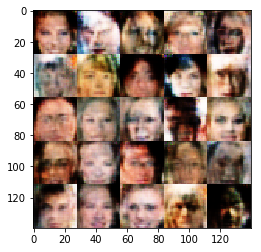

Epoch 1/1... Discriminator Loss: 0.9696... Generator Loss: 0.9980
Epoch 1/1... Discriminator Loss: 0.5272... Generator Loss: 1.7115
Epoch 1/1... Discriminator Loss: 0.6406... Generator Loss: 1.1341
Epoch 1/1... Discriminator Loss: 0.8847... Generator Loss: 1.4988
Epoch 1/1... Discriminator Loss: 0.7666... Generator Loss: 1.2208
Epoch 1/1... Discriminator Loss: 0.6600... Generator Loss: 1.1490
Epoch 1/1... Discriminator Loss: 0.1942... Generator Loss: 2.5596
Epoch 1/1... Discriminator Loss: 1.0564... Generator Loss: 0.5589
Epoch 1/1... Discriminator Loss: 0.4289... Generator Loss: 1.3894
Epoch 1/1... Discriminator Loss: 1.0112... Generator Loss: 0.5970


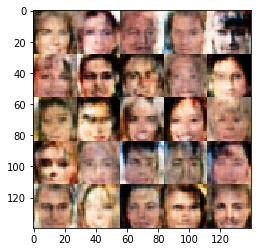

Epoch 1/1... Discriminator Loss: 0.1349... Generator Loss: 4.2203
Epoch 1/1... Discriminator Loss: 0.8247... Generator Loss: 0.7876
Epoch 1/1... Discriminator Loss: 0.1975... Generator Loss: 2.5675
Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 4.0417
Epoch 1/1... Discriminator Loss: 0.1705... Generator Loss: 2.3447
Epoch 1/1... Discriminator Loss: 0.0524... Generator Loss: 5.3434
Epoch 1/1... Discriminator Loss: 0.0797... Generator Loss: 5.1928
Epoch 1/1... Discriminator Loss: 0.2477... Generator Loss: 1.9063
Epoch 1/1... Discriminator Loss: 0.0868... Generator Loss: 3.1475
Epoch 1/1... Discriminator Loss: 0.0866... Generator Loss: 3.8193


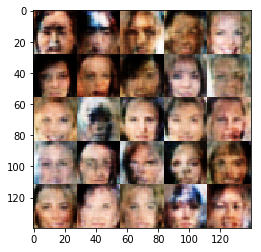

Epoch 1/1... Discriminator Loss: 0.0860... Generator Loss: 3.3371
Epoch 1/1... Discriminator Loss: 0.1237... Generator Loss: 4.8352
Epoch 1/1... Discriminator Loss: 0.1560... Generator Loss: 2.3881
Epoch 1/1... Discriminator Loss: 1.2600... Generator Loss: 1.6550
Epoch 1/1... Discriminator Loss: 0.5479... Generator Loss: 1.3088
Epoch 1/1... Discriminator Loss: 0.4961... Generator Loss: 3.7994
Epoch 1/1... Discriminator Loss: 0.3380... Generator Loss: 2.2590
Epoch 1/1... Discriminator Loss: 0.3238... Generator Loss: 1.7830
Epoch 1/1... Discriminator Loss: 0.1854... Generator Loss: 7.5471
Epoch 1/1... Discriminator Loss: 2.2692... Generator Loss: 2.2674


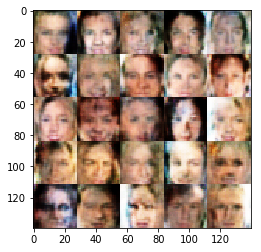

Epoch 1/1... Discriminator Loss: 0.1459... Generator Loss: 3.3615
Epoch 1/1... Discriminator Loss: 0.0849... Generator Loss: 3.9287
Epoch 1/1... Discriminator Loss: 0.8539... Generator Loss: 3.3362
Epoch 1/1... Discriminator Loss: 0.9914... Generator Loss: 0.6558
Epoch 1/1... Discriminator Loss: 0.1102... Generator Loss: 3.1029
Epoch 1/1... Discriminator Loss: 1.5749... Generator Loss: 0.8487
Epoch 1/1... Discriminator Loss: 0.6691... Generator Loss: 1.2092
Epoch 1/1... Discriminator Loss: 0.0852... Generator Loss: 3.4829
Epoch 1/1... Discriminator Loss: 0.1133... Generator Loss: 3.0330
Epoch 1/1... Discriminator Loss: 0.0521... Generator Loss: 4.0070


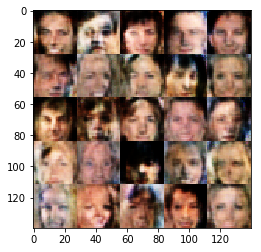

Epoch 1/1... Discriminator Loss: 0.2105... Generator Loss: 4.9359
Epoch 1/1... Discriminator Loss: 0.0796... Generator Loss: 3.5079
Epoch 1/1... Discriminator Loss: 0.0747... Generator Loss: 7.9579
Epoch 1/1... Discriminator Loss: 0.0525... Generator Loss: 9.5995
Epoch 1/1... Discriminator Loss: 0.0380... Generator Loss: 4.1214
Epoch 1/1... Discriminator Loss: 0.0231... Generator Loss: 5.1675
Epoch 1/1... Discriminator Loss: 0.1227... Generator Loss: 2.7130
Epoch 1/1... Discriminator Loss: 0.0237... Generator Loss: 6.8562
Epoch 1/1... Discriminator Loss: 0.0273... Generator Loss: 7.1769
Epoch 1/1... Discriminator Loss: 0.0466... Generator Loss: 4.2555


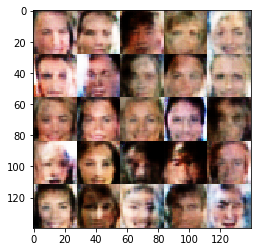

Epoch 1/1... Discriminator Loss: 0.1858... Generator Loss: 2.2097
Epoch 1/1... Discriminator Loss: 0.1123... Generator Loss: 2.6847
Epoch 1/1... Discriminator Loss: 0.9882... Generator Loss: 0.8724
Epoch 1/1... Discriminator Loss: 0.7265... Generator Loss: 1.1448
Epoch 1/1... Discriminator Loss: 1.0297... Generator Loss: 3.8667
Epoch 1/1... Discriminator Loss: 0.7693... Generator Loss: 3.0609
Epoch 1/1... Discriminator Loss: 0.5564... Generator Loss: 1.1796
Epoch 1/1... Discriminator Loss: 0.3204... Generator Loss: 5.0128
Epoch 1/1... Discriminator Loss: 0.6312... Generator Loss: 1.0720
Epoch 1/1... Discriminator Loss: 0.6032... Generator Loss: 1.5659


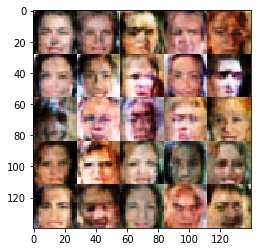

Epoch 1/1... Discriminator Loss: 0.2837... Generator Loss: 1.6739
Epoch 1/1... Discriminator Loss: 2.3284... Generator Loss: 0.1700
Epoch 1/1... Discriminator Loss: 0.7023... Generator Loss: 0.9943
Epoch 1/1... Discriminator Loss: 1.2699... Generator Loss: 0.4613
Epoch 1/1... Discriminator Loss: 0.9399... Generator Loss: 0.7353
Epoch 1/1... Discriminator Loss: 1.8710... Generator Loss: 0.2288
Epoch 1/1... Discriminator Loss: 0.0813... Generator Loss: 3.6509
Epoch 1/1... Discriminator Loss: 3.4956... Generator Loss: 4.8416
Epoch 1/1... Discriminator Loss: 0.2870... Generator Loss: 1.9974
Epoch 1/1... Discriminator Loss: 0.1227... Generator Loss: 3.1756


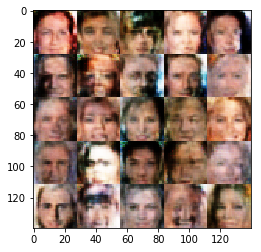

Epoch 1/1... Discriminator Loss: 0.3114... Generator Loss: 1.7999
Epoch 1/1... Discriminator Loss: 0.0655... Generator Loss: 4.7580
Epoch 1/1... Discriminator Loss: 0.4497... Generator Loss: 2.1430
Epoch 1/1... Discriminator Loss: 0.8920... Generator Loss: 0.7307
Epoch 1/1... Discriminator Loss: 0.6814... Generator Loss: 1.1228
Epoch 1/1... Discriminator Loss: 0.1654... Generator Loss: 2.6218
Epoch 1/1... Discriminator Loss: 0.4503... Generator Loss: 3.1176
Epoch 1/1... Discriminator Loss: 0.1354... Generator Loss: 4.7693
Epoch 1/1... Discriminator Loss: 0.0798... Generator Loss: 4.7635
Epoch 1/1... Discriminator Loss: 0.0308... Generator Loss: 6.0145


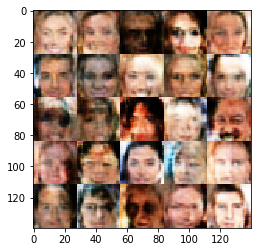

Epoch 1/1... Discriminator Loss: 0.0280... Generator Loss: 5.1538
Epoch 1/1... Discriminator Loss: 0.0690... Generator Loss: 3.4480
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 0.7755
Epoch 1/1... Discriminator Loss: 0.5742... Generator Loss: 1.7002
Epoch 1/1... Discriminator Loss: 0.9929... Generator Loss: 0.6224
Epoch 1/1... Discriminator Loss: 0.6853... Generator Loss: 1.8358
Epoch 1/1... Discriminator Loss: 0.6518... Generator Loss: 1.5436
Epoch 1/1... Discriminator Loss: 0.9254... Generator Loss: 2.6472
Epoch 1/1... Discriminator Loss: 0.6735... Generator Loss: 1.0837
Epoch 1/1... Discriminator Loss: 0.5760... Generator Loss: 1.6654


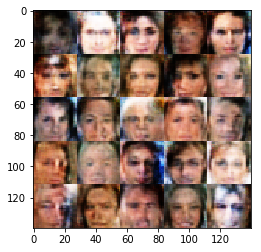

Epoch 1/1... Discriminator Loss: 1.3252... Generator Loss: 4.5575
Epoch 1/1... Discriminator Loss: 0.4045... Generator Loss: 1.4904
Epoch 1/1... Discriminator Loss: 0.1424... Generator Loss: 2.7881
Epoch 1/1... Discriminator Loss: 0.2095... Generator Loss: 2.3637
Epoch 1/1... Discriminator Loss: 0.1179... Generator Loss: 3.4474
Epoch 1/1... Discriminator Loss: 0.0827... Generator Loss: 4.5736
Epoch 1/1... Discriminator Loss: 0.5664... Generator Loss: 1.0452
Epoch 1/1... Discriminator Loss: 0.1842... Generator Loss: 2.1853
Epoch 1/1... Discriminator Loss: 0.0494... Generator Loss: 7.1099
Epoch 1/1... Discriminator Loss: 2.8149... Generator Loss: 0.1156


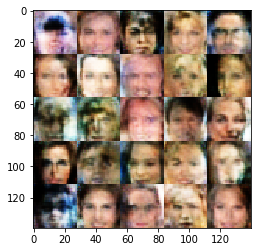

Epoch 1/1... Discriminator Loss: 0.8227... Generator Loss: 1.4217
Epoch 1/1... Discriminator Loss: 1.3546... Generator Loss: 0.5174
Epoch 1/1... Discriminator Loss: 0.3570... Generator Loss: 2.2623
Epoch 1/1... Discriminator Loss: 0.2495... Generator Loss: 2.6140
Epoch 1/1... Discriminator Loss: 1.8314... Generator Loss: 0.2478
Epoch 1/1... Discriminator Loss: 0.7411... Generator Loss: 0.9033
Epoch 1/1... Discriminator Loss: 0.5833... Generator Loss: 1.2256
Epoch 1/1... Discriminator Loss: 1.0148... Generator Loss: 3.7090
Epoch 1/1... Discriminator Loss: 0.7076... Generator Loss: 1.7153
Epoch 1/1... Discriminator Loss: 0.0594... Generator Loss: 4.8991


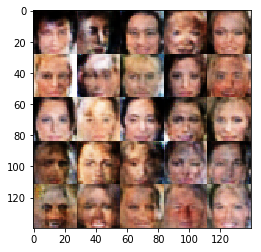

Epoch 1/1... Discriminator Loss: 0.1602... Generator Loss: 2.5048
Epoch 1/1... Discriminator Loss: 0.0704... Generator Loss: 3.0943
Epoch 1/1... Discriminator Loss: 3.4303... Generator Loss: 5.5585
Epoch 1/1... Discriminator Loss: 0.4087... Generator Loss: 1.5597
Epoch 1/1... Discriminator Loss: 0.0924... Generator Loss: 3.2651
Epoch 1/1... Discriminator Loss: 1.2343... Generator Loss: 3.6192
Epoch 1/1... Discriminator Loss: 0.0696... Generator Loss: 3.5723
Epoch 1/1... Discriminator Loss: 0.2639... Generator Loss: 1.9036
Epoch 1/1... Discriminator Loss: 0.0699... Generator Loss: 3.7058
Epoch 1/1... Discriminator Loss: 2.1664... Generator Loss: 3.8614


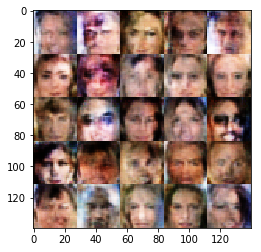

Epoch 1/1... Discriminator Loss: 0.3381... Generator Loss: 1.5923
Epoch 1/1... Discriminator Loss: 0.3598... Generator Loss: 2.0253
Epoch 1/1... Discriminator Loss: 0.3902... Generator Loss: 2.8464
Epoch 1/1... Discriminator Loss: 0.9905... Generator Loss: 2.1861
Epoch 1/1... Discriminator Loss: 0.3177... Generator Loss: 3.7579
Epoch 1/1... Discriminator Loss: 0.1999... Generator Loss: 2.6479
Epoch 1/1... Discriminator Loss: 0.1362... Generator Loss: 2.7365
Epoch 1/1... Discriminator Loss: 0.1519... Generator Loss: 2.6327
Epoch 1/1... Discriminator Loss: 0.8646... Generator Loss: 0.9388
Epoch 1/1... Discriminator Loss: 0.2305... Generator Loss: 2.2717


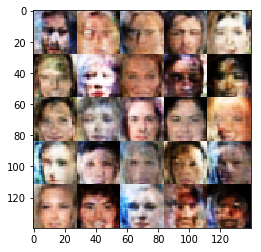

Epoch 1/1... Discriminator Loss: 0.0582... Generator Loss: 4.2623
Epoch 1/1... Discriminator Loss: 0.0714... Generator Loss: 5.3239
Epoch 1/1... Discriminator Loss: 0.6971... Generator Loss: 2.9906
Epoch 1/1... Discriminator Loss: 0.7306... Generator Loss: 0.9272
Epoch 1/1... Discriminator Loss: 0.4975... Generator Loss: 1.4931
Epoch 1/1... Discriminator Loss: 0.0497... Generator Loss: 4.3639
Epoch 1/1... Discriminator Loss: 0.5054... Generator Loss: 3.1542
Epoch 1/1... Discriminator Loss: 1.0294... Generator Loss: 1.7227
Epoch 1/1... Discriminator Loss: 0.5535... Generator Loss: 1.0882
Epoch 1/1... Discriminator Loss: 1.7942... Generator Loss: 0.2688


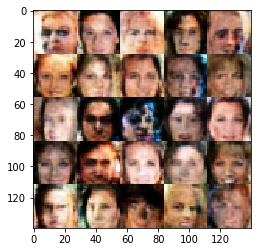

Epoch 1/1... Discriminator Loss: 0.9721... Generator Loss: 0.7247
Epoch 1/1... Discriminator Loss: 0.2887... Generator Loss: 2.0200
Epoch 1/1... Discriminator Loss: 0.5597... Generator Loss: 1.2603
Epoch 1/1... Discriminator Loss: 0.1325... Generator Loss: 2.8494
Epoch 1/1... Discriminator Loss: 0.1019... Generator Loss: 4.8893
Epoch 1/1... Discriminator Loss: 0.0390... Generator Loss: 5.2989
Epoch 1/1... Discriminator Loss: 0.0313... Generator Loss: 5.8176
Epoch 1/1... Discriminator Loss: 0.1368... Generator Loss: 3.5031
Epoch 1/1... Discriminator Loss: 1.6313... Generator Loss: 5.1454
Epoch 1/1... Discriminator Loss: 0.3987... Generator Loss: 1.6075


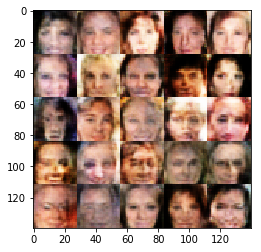

Epoch 1/1... Discriminator Loss: 0.3244... Generator Loss: 2.5115
Epoch 1/1... Discriminator Loss: 0.1686... Generator Loss: 2.8337
Epoch 1/1... Discriminator Loss: 0.4678... Generator Loss: 1.2839
Epoch 1/1... Discriminator Loss: 0.0732... Generator Loss: 3.6556
Epoch 1/1... Discriminator Loss: 0.4585... Generator Loss: 1.3303
Epoch 1/1... Discriminator Loss: 0.3457... Generator Loss: 2.3758
Epoch 1/1... Discriminator Loss: 0.4310... Generator Loss: 1.3410
Epoch 1/1... Discriminator Loss: 0.3953... Generator Loss: 4.1902
Epoch 1/1... Discriminator Loss: 0.1275... Generator Loss: 2.5082
Epoch 1/1... Discriminator Loss: 0.0791... Generator Loss: 3.1504


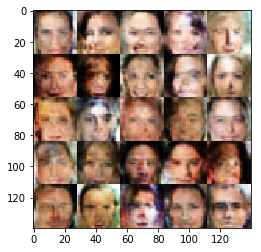

Epoch 1/1... Discriminator Loss: 0.2102... Generator Loss: 2.0809
Epoch 1/1... Discriminator Loss: 0.0320... Generator Loss: 4.2650
Epoch 1/1... Discriminator Loss: 0.5714... Generator Loss: 1.1821
Epoch 1/1... Discriminator Loss: 0.2075... Generator Loss: 2.5886
Epoch 1/1... Discriminator Loss: 1.5901... Generator Loss: 0.3777
Epoch 1/1... Discriminator Loss: 0.8304... Generator Loss: 0.9230
Epoch 1/1... Discriminator Loss: 1.3350... Generator Loss: 2.5424
Epoch 1/1... Discriminator Loss: 0.5181... Generator Loss: 1.2656
Epoch 1/1... Discriminator Loss: 0.9381... Generator Loss: 0.8510
Epoch 1/1... Discriminator Loss: 0.1685... Generator Loss: 2.3352


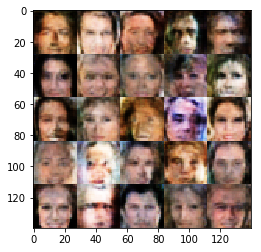

Epoch 1/1... Discriminator Loss: 0.6969... Generator Loss: 1.0740
Epoch 1/1... Discriminator Loss: 0.6427... Generator Loss: 3.7618
Epoch 1/1... Discriminator Loss: 0.6194... Generator Loss: 2.9947
Epoch 1/1... Discriminator Loss: 1.3522... Generator Loss: 0.4043
Epoch 1/1... Discriminator Loss: 1.2254... Generator Loss: 0.6626
Epoch 1/1... Discriminator Loss: 0.5336... Generator Loss: 1.2040
Epoch 1/1... Discriminator Loss: 0.5570... Generator Loss: 1.5461
Epoch 1/1... Discriminator Loss: 0.0436... Generator Loss: 4.9744
Epoch 1/1... Discriminator Loss: 0.1279... Generator Loss: 2.8775
Epoch 1/1... Discriminator Loss: 1.5101... Generator Loss: 5.2724


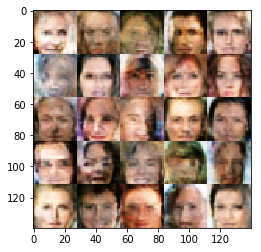

Epoch 1/1... Discriminator Loss: 1.9714... Generator Loss: 0.2916
Epoch 1/1... Discriminator Loss: 0.2350... Generator Loss: 2.1291
Epoch 1/1... Discriminator Loss: 0.0545... Generator Loss: 4.3984
Epoch 1/1... Discriminator Loss: 0.4636... Generator Loss: 1.2394
Epoch 1/1... Discriminator Loss: 0.0714... Generator Loss: 4.2571
Epoch 1/1... Discriminator Loss: 0.5849... Generator Loss: 1.0254
Epoch 1/1... Discriminator Loss: 0.7926... Generator Loss: 4.4620
Epoch 1/1... Discriminator Loss: 0.1219... Generator Loss: 3.6274
Epoch 1/1... Discriminator Loss: 0.0535... Generator Loss: 5.0468
Epoch 1/1... Discriminator Loss: 0.0485... Generator Loss: 4.8816


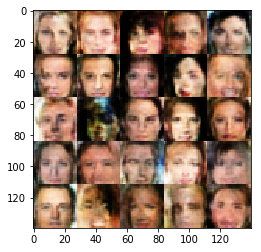

Epoch 1/1... Discriminator Loss: 0.1138... Generator Loss: 2.6919
Epoch 1/1... Discriminator Loss: 0.0334... Generator Loss: 5.0316
Epoch 1/1... Discriminator Loss: 0.4414... Generator Loss: 1.4204
Epoch 1/1... Discriminator Loss: 0.6347... Generator Loss: 5.6434
Epoch 1/1... Discriminator Loss: 0.4524... Generator Loss: 2.4003
Epoch 1/1... Discriminator Loss: 0.6371... Generator Loss: 4.6133
Epoch 1/1... Discriminator Loss: 0.7257... Generator Loss: 0.9924
Epoch 1/1... Discriminator Loss: 0.9578... Generator Loss: 0.7205
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.3655
Epoch 1/1... Discriminator Loss: 0.2699... Generator Loss: 2.2230


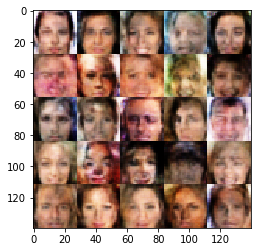

Epoch 1/1... Discriminator Loss: 0.1002... Generator Loss: 3.1232
Epoch 1/1... Discriminator Loss: 0.2925... Generator Loss: 1.9468
Epoch 1/1... Discriminator Loss: 0.5770... Generator Loss: 3.3054
Epoch 1/1... Discriminator Loss: 0.9572... Generator Loss: 0.6833
Epoch 1/1... Discriminator Loss: 0.4510... Generator Loss: 3.3215
Epoch 1/1... Discriminator Loss: 0.3374... Generator Loss: 1.7037
Epoch 1/1... Discriminator Loss: 1.7104... Generator Loss: 0.3344
Epoch 1/1... Discriminator Loss: 0.4481... Generator Loss: 1.3597
Epoch 1/1... Discriminator Loss: 0.1271... Generator Loss: 3.1532
Epoch 1/1... Discriminator Loss: 0.3893... Generator Loss: 4.0899


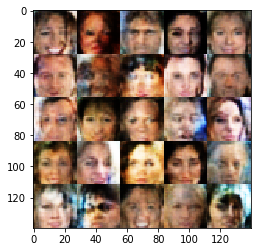

Epoch 1/1... Discriminator Loss: 0.3341... Generator Loss: 1.7660
Epoch 1/1... Discriminator Loss: 0.3398... Generator Loss: 1.7514
Epoch 1/1... Discriminator Loss: 0.0426... Generator Loss: 4.6579
Epoch 1/1... Discriminator Loss: 0.1393... Generator Loss: 2.6100
Epoch 1/1... Discriminator Loss: 0.2127... Generator Loss: 3.4084
Epoch 1/1... Discriminator Loss: 0.4428... Generator Loss: 1.2729
Epoch 1/1... Discriminator Loss: 0.9782... Generator Loss: 2.9500
Epoch 1/1... Discriminator Loss: 0.5987... Generator Loss: 1.1590
Epoch 1/1... Discriminator Loss: 0.4246... Generator Loss: 2.5897
Epoch 1/1... Discriminator Loss: 0.1069... Generator Loss: 5.9649


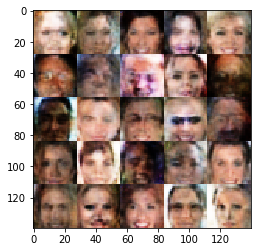

Epoch 1/1... Discriminator Loss: 0.8906... Generator Loss: 0.7181
Epoch 1/1... Discriminator Loss: 0.1389... Generator Loss: 3.8383
Epoch 1/1... Discriminator Loss: 0.4502... Generator Loss: 2.7877
Epoch 1/1... Discriminator Loss: 0.2633... Generator Loss: 1.8665
Epoch 1/1... Discriminator Loss: 0.2031... Generator Loss: 3.1734
Epoch 1/1... Discriminator Loss: 2.0386... Generator Loss: 0.2674
Epoch 1/1... Discriminator Loss: 1.1207... Generator Loss: 3.6913
Epoch 1/1... Discriminator Loss: 0.6997... Generator Loss: 3.1375
Epoch 1/1... Discriminator Loss: 0.4240... Generator Loss: 2.7489
Epoch 1/1... Discriminator Loss: 0.5807... Generator Loss: 1.2712


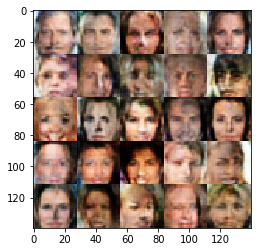

Epoch 1/1... Discriminator Loss: 0.4890... Generator Loss: 2.4764
Epoch 1/1... Discriminator Loss: 0.5405... Generator Loss: 1.3186
Epoch 1/1... Discriminator Loss: 0.5317... Generator Loss: 1.2191
Epoch 1/1... Discriminator Loss: 0.4331... Generator Loss: 1.4687


KeyboardInterrupt: 

In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.